# 基于深度学习的文本分类方法

## 主要内容    
* 前提介绍   
* 深度学习简介:机器学习是学习样本与目标的函数关系,而深度学习相当于万能函数模拟器     
* RNN, LSTM原理介绍:此类网络的结构决定了其适合学习此类内容(限定了函数空间范围)   
* pytorch介绍   
* torchtext、文本分类案例介绍

## 0. 前提介绍   
行业偏离度模型的业务逻辑并不复杂, 利用征信公司名称预测征信行业, 并与实际表填行业相比较    
这是一个典型的文本分类模型, 项目建设中使用了深度学习中的LSTM算法进行模型建设,    
因此本次培训主要介绍LSTM算法相关的理论与实践方法

（今天的这个培训主要是结合之前我做的一个“行业偏离度”模型进行的，由于这个模型在业务逻辑上很简单，就是利用征信公司名称预测征信行业, 并与实际表填行业相比较，没有太多值得介绍的，所以本次培训以介绍建模技术为主要内容，这个模型的建设主要使用了“基于深度学习的文本分类”，后续我会介绍相关的理论与实践方法，由于信息安全的原因，介绍实践的过程会利用公开数据源进行）

## 1. 深度学习简介

#### Demo演示

https://cs.stanford.edu/people/karpathy/convnetjs//demo/classify2d.html

## 2. RNN, LSTM原理简介

Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

### 2.1 RNN的计算图&展开后的计算图

<img src="imgs/p1.png" align="left"/>

<img src="imgs/p2.png" align="left"/>

### 2.2 原版RNN存在长期依赖问题

（然而理论中考虑了信息之间的相互依赖，并不代表实际使用中就能充分的利用这种依赖，实际上，原版的RNN难以保留长期依赖相关的信息，比如,如果利用RNN构建一个文本预测模型，那么）

天空中有*云*    
* 短期依赖, RNN可以正常识别

<img src="imgs/p3.png" align="left"/>

我在法国长大, ............... 我可以说流利的*法语*    
* 长期依赖, RNN难以识别(梯度长期传播会逐渐消失, 逻辑上类似 0.1^100 -> 0)

<img src="imgs/p4.png" align="left"/>

### 2.3 LSTM: 同时考虑长、短期记忆的RNN

<img src="imgs/p5.png" align="left"/>

<img src="imgs/p6.png" align="left"/>

#### 2.3.1 通过增加线性运算部分，解决长期依赖问题    
* C：cell state

<img src="imgs/p7.png" align="left"/>

#### 2.3.2 控制cell state信息的保留部分   
* f: forget gate

<img src="imgs/p8.png" align="left"/>

#### 2.3.3 控制cell state信息的新增部分    
* i: input gate

<img src="imgs/p9.png" align="left"/>

#### 2.3.4 生成新的cell state信息

<img src="imgs/p10.png" align="left"/>

#### 2.3.5 以非线性方式生成h     
* 与原有RNN结构类似, 不过是基于更新后的cell state

<img src="imgs/p11.png" align="left"/>

## 3. pytorch介绍

### 3.1 pytorch简介    
* pytorch是什么: PyTorch是一个开源的Python机器学习库，基于Torch，最初由Facebook开发
* 为什么使用pytorch: 动态计算图便于构建网络, 便于调试; 无需使用新增语法构建网络, 使用python标准语法即可

<img src="imgs/pytorch_joke.png" align="left"/>

### 3.2 pytorch主要部分：  
* tensor: 张量      
    * 存储数据的基本变量(可以认为是多维数组)       
           
* autograd: 自动微分系统
    * 深度学习的算法本质上是通过反向传播求导数，而autograd模块则实现了此功能。在Tensor上的所有操作，autograd都能为它们自动提供微分
                  
* nn: 常用神经网络的封装与函数
    * Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，torch.nn是专门为神经网络设计的模块化接口。nn构建于Autograd之上，可用来定义和运行神经网络。
    * nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，利用nn.Module搭建网络,仅需实现初始化以及前向传播,而无需实现反向传播     
                 
* 其他: 优化器(torch.optim), 其它函数(nn.Functional)

(下面简单介绍一下tensor和nn的操作方式)

#### 3.2.1 Tensor例子

In [3]:
import numpy as np
import pandas as pd

/home/azurite/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
import torch as t # 注意包名是torch, 不是pytorch

几个Tensor操作的例子

In [5]:
x = t.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [6]:
# 使用[0,1]均匀分布随机初始化二维数组
x = t.rand(5, 3)  
x

tensor([[0.9463, 0.9429, 0.7729],
        [0.3115, 0.0486, 0.6924],
        [0.3575, 0.8814, 0.3176],
        [0.0646, 0.0846, 0.5125],
        [0.7087, 0.8991, 0.7255]])

In [7]:
a = t.ones(5) # 新建一个全1的Tensor
a

tensor([1., 1., 1., 1., 1.])

In [8]:
# Tensor和 Numpy array可以相互转换
b = a.numpy() # Tensor -> Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [9]:
a = np.ones(5)
b = t.from_numpy(a) # Numpy->Tensor
print(a)
print(b) 

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### 3.2.2 nn.Module例子

* 基于nn.Module定义网络时, 需要继承`nn.Module`, 并仅需实现其初始化方法(`__init__`, 告诉框架结构如何, 哪些是可训练参数), 以及前向传播方法(`forward`), 而无需实现反向传播方法(框架会利用`autograd`自动生成反向传播方法)       
* 如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用`nn.functional`代替。

多层感知机的网络结构如图4-1所示，它由两个全连接层组成，采用$sigmoid$函数作为激活函数，图中没有画出。
![多层感知机](imgs/multi_perceptron.png)

这是一个基础的前馈(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。 

In [11]:
import torch.nn as nn

In [12]:
class Perceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        # 此处使用了nn中预先定义好的线性层的结构, 第一个参数是输入维度,第二个是输出维度
        self.layer1 = nn.Linear(in_features, hidden_features) 
        self.layer2 = nn.Linear(hidden_features, out_features)
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)

In [13]:
perceptron = Perceptron(3, 4, 1) #生成如上图的3个input, 4个隐藏单元, 1个output的网络结构的实例
for name, param in perceptron.named_parameters():
    print(name, param.size())

layer1.weight torch.Size([4, 3])
layer1.bias torch.Size([4])
layer2.weight torch.Size([1, 4])
layer2.bias torch.Size([1])


#### 3.2.3 一个简单的全流程训练例子   
基于pytorch的模型的训练流程，主要由以下几部分组成    
* 处理数据
* 构建网络    
* 确定损失函数和优化方法   
* 开始进行优化

In [14]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [19]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

处理数据(生成dummy数据)    

In [20]:
def generate_dataset(size=100):
    # 公式: y = 3x + 4 + ε
    inputs = []
    outputs = []
    for ix in range(size):
        random_number = np.random.randint(100) / 100
        inputs.append([random_number])
        outputs.append([3 * random_number + 4 + np.random.normal() / 10])
    return inputs, outputs

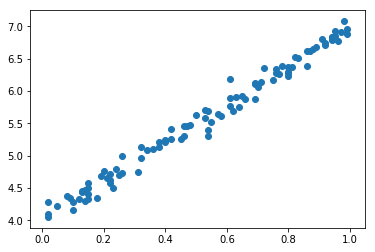

In [21]:
# 来看看产生的x-y分布
test_x, test_y = generate_dataset()
plt.scatter(test_x, test_y)

构建网络

In [22]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.fc = nn.Linear(1, 1)
    
    def forward(self, x):
        x = self.fc(x)
        return x
    
model = LR()

确定损失函数和优化方法

In [23]:
# define critereon - loss function
critereon = nn.MSELoss()
# define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.01)

开始进行优化

In [24]:
inputs, labels = generate_dataset(100)
nb_epochs = 30
for epoch in range(nb_epochs):
    epoch_loss = 0
    for ix, x in enumerate(inputs):
        # here x is the input. i.e. the input value of x
        # and y_train[ix] is the output. i.e. y = f(x) = 3x + 4
        y_pred = model(t.Tensor(x))
        
        loss = critereon(y_pred, t.Tensor(labels[ix]))
        
        epoch_loss = loss.data.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 5 == 4:
        print("Epoch {} : Loss {}".format(epoch, epoch_loss))

Epoch 4 : Loss 0.003618097398430109
Epoch 9 : Loss 0.007106496952474117
Epoch 14 : Loss 0.009541959501802921
Epoch 19 : Loss 0.011044839397072792
Epoch 24 : Loss 0.011924119666218758
Epoch 29 : Loss 0.012425823137164116


简要测试

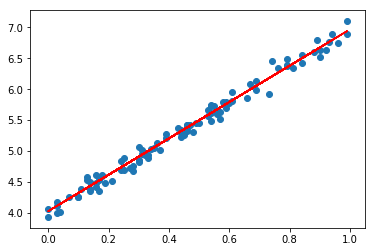

In [25]:
#x_test, y_test = get_fake_data(batch_size=40)
label_pred = model(t.Tensor(inputs))
plt.scatter(inputs, labels) # predicted

plt.plot(inputs, label_pred.detach().numpy(), 'r')
plt.show()

## 4. torchtext、文本分类案例介绍    
基于上述的理论与实践知识，我们可以开始建设实际的文本分类模型了，我们会基于`Toxic Comment Classification`这个例子进行介绍    
由于实际工程任务中，预处理相关操作较为繁琐，在这里我也会同步介绍一个用于文本预处理的torchtext包

`Toxic Comment Classification`： “有毒”评论分类   
数据选取了Wikipedia’s talk page edits下的评论，分别被标注了toxic、severe_toxic、obscene、threat、insult以及identity_hate这6类标签，目的是建立模型以判断某条评论是否出现以上行为

<img src="imgs/torchtext_routine.png" align="left"/>

### 4.1 查看数据基本情况

In [26]:
!ls data

test.csv  train.csv  valid.csv


In [27]:
tp = pd.read_csv("data/train.csv").head(2)

In [28]:
tp

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [29]:
tp['comment_text'].iloc[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

### 4.2 声明 Fields

如何对文本数据进行预处理并转换为数字，是利用Field实现的

In [70]:
import torch
from torchtext.data import Field

我们想把comment_text转化为小写，并按空格进行token化，所以如下选择Field参数

In [31]:
tokenize = lambda x: x.split()
TEXT = Field(sequential=True, tokenize=tokenize, lower=True)

由于此数据集中标签已进行基础处理，所以对标签的处理就更为简单

In [32]:
LABEL = Field(sequential=False, use_vocab=False)

### 4.3 生成数据集

由于数据源是csv格式的，我们使用TabularDataset读取数据 (目前TabularDataset可以处理csv, tsv, 以及json文件)

In [33]:
from torchtext.data import TabularDataset

对于训练、验证数据，我们需要处理标签，传入参数的顺序必须与数据集中的顺序一直（不需要的数据可以传个None）

In [34]:
%%time
tv_datafields = [("id", None), 
                 ("comment_text", TEXT), ("toxic", LABEL),
                 ("severe_toxic", LABEL), ("threat", LABEL),
                 ("obscene", LABEL), ("insult", LABEL),
                 ("identity_hate", LABEL)]

trn, vld = TabularDataset.splits(
        path="data", # 数据都在data文件夹下
        train='train.csv', validation="valid.csv",
        format='csv',
        skip_header=True,
        fields=tv_datafields)

CPU times: user 2.45 ms, sys: 374 µs, total: 2.83 ms
Wall time: 4.83 ms


测试集中没有任何的标签

In [35]:
%%time
tst_datafields = [("id", None), 
                 ("comment_text", TEXT)
]

tst = TabularDataset(
        path="data/test.csv", # the file path
        format='csv',
        skip_header=True,
        fields=tst_datafields)

CPU times: user 2.1 ms, sys: 319 µs, total: 2.42 ms
Wall time: 4.16 ms


embedding(词嵌入，用一个低维向量表示词) 之类的后续处理，需要先将文本转化为数字，因此我们需要基于文本构建词库，构建方法如下

In [36]:
%%time
TEXT.build_vocab(trn)

CPU times: user 1.4 ms, sys: 212 µs, total: 1.61 ms
Wall time: 1.61 ms


词库如下， vocab.freqs是一个collections.Counter对象，所以我们可以看一下最常出现的几个词

In [37]:
TEXT.vocab.freqs.most_common(10)

[('the', 78),
 ('to', 41),
 ('you', 33),
 ('of', 30),
 ('and', 26),
 ('a', 26),
 ('is', 24),
 ('that', 22),
 ('i', 20),
 ('if', 19)]

我们稍微看一下数据集被转换成什么样子，数据集可以像list一样使用索引

In [39]:
trn[0].comment_text[:3]

['explanation', 'why', 'the']

### 创建迭代器

In [64]:
from torchtext.data import Iterator, BucketIterator

对train和valid数据集，我们使用一种特殊的iterator，叫**BucketIterator**    
当我们使用神经网络进行训练时，每一个batch的长度应该是一样的，长度不足的会补0，过长的会切断   
e.g.
\[ 
\[3, 15, 2, 7\],
\[4, 1\], 
\[5, 5, 6, 8, 1\] 
\] -> \[ 
\[3, 15, 2, 7, **0**\],
\[4, 1, **0**, **0**, **0**\], 
\[5, 5, 6, 8, 1\] 
\]    
如果数据长度相差太多，处理过程就会比较费时    
BucketIterator会将相似长度的数据放到一起处理，降低耗时

In [65]:
train_iter, val_iter = BucketIterator.splits(
        (trn, vld), # we pass in the datasets we want the iterator to draw data from
        batch_sizes=(64, 64),
        device=-1, # if you want to use the GPU, specify the GPU number here
        sort_key=lambda x: len(x.comment_text), # the BucketIterator needs to be told what function it should use to group the data.
        sort_within_batch=False,
        repeat=False # we pass repeat=False because we want to wrap this Iterator layer.
)

The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.


test部分不需要重排序，所以使用标准的Iterator

In [66]:
test_iter = Iterator(tst, batch_size=64, device=-1, sort=False, sort_within_batch=False, repeat=False)

The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.


### 封装迭代器

为了便于使用，我们将把batch转换为形式为（x，y）的元组，其中x是自变量（模型的输入），y是因变量（标签数据）

In [67]:
class BatchWrapper:
    def __init__(self, dl, x_var, y_vars):
        self.dl, self.x_var, self.y_vars = dl, x_var, y_vars # we pass in the list of attributes for x and y
    
    def __iter__(self):
        for batch in self.dl:
            x = getattr(batch, self.x_var) # we assume only one input in this wrapper
            
            if self.y_vars is not None: # we will concatenate y into a single tensor
                y = torch.cat([getattr(batch, feat).unsqueeze(1) for feat in self.y_vars], dim=1).float()
            else:
                y = torch.zeros((1))

            yield (x, y)
    
    def __len__(self):
        return len(self.dl)

用上面这个类来封装BucketIterator

In [68]:
train_dl = BatchWrapper(train_iter, "comment_text", ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"])
valid_dl = BatchWrapper(val_iter, "comment_text", ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"])
test_dl = BatchWrapper(test_iter, "comment_text", None)

下面就是每一组我们实际用来训练的数据、标签在经过上述预处理后的结果

In [71]:
next(train_dl.__iter__())

(tensor([[660,  63,  15,  ..., 354,  15,  44],
         [ 11,   4,  46,  ...,  63,  29, 739],
         [  2, 664,  10,  ...,   4,  21,   3],
         ...,
         [  1,   1,   1,  ...,   1,  84,   1],
         [  1,   1,   1,  ...,   1, 118,   1],
         [  1,   1,   1,  ...,   1,  15,   1]]),
 tensor([[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
  

### 建立并训练文本分类器

此处利用我们上面提到的LSTM建立模型

In [72]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [73]:
help(nn.Embedding)

Help on class Embedding in module torch.nn.modules.sparse:

class Embedding(torch.nn.modules.module.Module)
 |  A simple lookup table that stores embeddings of a fixed dictionary and size.
 |  
 |  This module is often used to store word embeddings and retrieve them using indices.
 |  The input to the module is a list of indices, and the output is the corresponding
 |  word embeddings.
 |  
 |  Args:
 |      num_embeddings (int): size of the dictionary of embeddings
 |      embedding_dim (int): the size of each embedding vector
 |      padding_idx (int, optional): If given, pads the output with the embedding vector at :attr:`padding_idx`
 |                                       (initialized to zeros) whenever it encounters the index.
 |      max_norm (float, optional): If given, each embedding vector with norm larger than :attr:`max_norm`
 |                                  is renormalized to have norm :attr:`max_norm`.
 |      norm_type (float, optional): The p of the p-norm to comput

In [74]:
class SimpleBiLSTMBaseline(nn.Module):
    def __init__(self, hidden_dim, emb_dim=300, recurrent_dropout=0.1, num_linear=1):
        super().__init__() # don't forget to call this!
        self.embedding = nn.Embedding(len(TEXT.vocab), emb_dim)
        self.encoder = nn.LSTM(emb_dim, hidden_dim, num_layers=1, dropout=recurrent_dropout)
        self.linear_layers = []
        for _ in range(num_linear - 1):
            self.linear_layers.append(nn.Linear(hidden_dim, hidden_dim))
        # 含可优化参数的层，需要使用nn.ModuleList, 这样其中可优化参数才能存到构造函数中的正确位置
        self.linear_layers = nn.ModuleList(self.linear_layers)
        self.predictor = nn.Linear(hidden_dim, 6)
    
    def forward(self, seq):
        hdn, _ = self.encoder(self.embedding(seq))
        feature = hdn[-1, :, :]
        for layer in self.linear_layers:
            feature = layer(feature)
        preds = self.predictor(feature)
        return preds

In [75]:
em_sz = 100
nh = 500
nl = 3
model = SimpleBiLSTMBaseline(nh, emb_dim=em_sz); model

/home/azurite/anaconda3/lib/python3.6/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


SimpleBiLSTMBaseline(
  (embedding): Embedding(784, 100)
  (encoder): LSTM(100, 500, dropout=0.1)
  (linear_layers): ModuleList()
  (predictor): Linear(in_features=500, out_features=6, bias=True)
)

If you're using a GPU, remember to call model.cuda() to move your model to the GPU.

In [76]:
model.cuda()

SimpleBiLSTMBaseline(
  (embedding): Embedding(784, 100)
  (encoder): LSTM(100, 500, dropout=0.1)
  (linear_layers): ModuleList()
  (predictor): Linear(in_features=500, out_features=6, bias=True)
)

### The training loop

In [77]:
import tqdm

In [78]:
opt = optim.Adam(model.parameters(), lr=1e-2)
loss_func = nn.BCEWithLogitsLoss()

In [79]:
epochs = 20

In [80]:
%%time
for epoch in range(1, epochs + 1):
    running_loss = 0.0
    running_corrects = 0
    model.train() # turn on training mode
    for x, y in tqdm.tqdm(train_dl): # thanks to our wrapper, we can intuitively iterate over our data!
        opt.zero_grad()
        x = x.cuda()
        y = y.cuda()
        preds = model(x)
        loss = loss_func(preds, y)
        loss.backward()
        opt.step()
        
        running_loss += loss.data.item() * x.size(0)
        
    epoch_loss = running_loss / len(trn)
    
    # calculate the validation loss for this epoch
    val_loss = 0.0
    model.eval() # turn on evaluation mode
    for x, y in valid_dl:
        x = x.cuda()
        y = y.cuda()
        preds = model(x)
        loss = loss_func(preds, y)
        val_loss += loss.data.item() * x.size(0)

    val_loss /= len(vld)
    print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch, epoch_loss, val_loss))

100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

Epoch: 1, Training Loss: 13.3428, Validation Loss: 2.0577



100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

Epoch: 2, Training Loss: 3.5562, Validation Loss: 1.8832



100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

Epoch: 3, Training Loss: 3.0052, Validation Loss: 2.0320



100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

Epoch: 4, Training Loss: 3.4152, Validation Loss: 1.9068



100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

Epoch: 5, Training Loss: 2.8913, Validation Loss: 2.0424



100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

Epoch: 6, Training Loss: 3.0458, Validation Loss: 2.1046



100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

Epoch: 7, Training Loss: 3.0925, Validation Loss: 2.0956



100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

Epoch: 8, Training Loss: 3.0174, Validation Loss: 2.0679



100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

Epoch: 9, Training Loss: 2.9133, Validation Loss: 2.0729



100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

Epoch: 10, Training Loss: 2.8691, Validation Loss: 2.1290



100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

Epoch: 11, Training Loss: 2.9281, Validation Loss: 2.1762



100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

Epoch: 12, Training Loss: 2.9727, Validation Loss: 2.1732



100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

Epoch: 13, Training Loss: 2.9180, Validation Loss: 2.1638



100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

Epoch: 14, Training Loss: 2.8657, Validation Loss: 2.1762



100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

Epoch: 15, Training Loss: 2.8740, Validation Loss: 2.2004



100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

Epoch: 16, Training Loss: 2.9080, Validation Loss: 2.2206



100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

Epoch: 17, Training Loss: 2.9218, Validation Loss: 2.2304



100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

Epoch: 18, Training Loss: 2.9048, Validation Loss: 2.2329



100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

Epoch: 19, Training Loss: 2.8753, Validation Loss: 2.2362
Epoch: 20, Training Loss: 2.8594, Validation Loss: 2.2470
CPU times: user 3.13 s, sys: 1.35 s, total: 4.48 s
Wall time: 4.43 s


### 预测

In [32]:
test_dl

In [93]:
test_preds = []
for x, y in tqdm.tqdm(test_dl):
    x = x.cuda()
    y = y.cuda()
    preds = model(x)
    # if you're data is on the GPU, you need to move the data back to the cpu
    preds = preds.data.cpu().numpy()
    # preds = preds.data.numpy()
    # the actual outputs of the model are logits, so we need to pass these values to the sigmoid function
    preds = 1 / (1 + np.exp(-preds))
    test_preds.append(preds)
#test_preds = np.hstack(test_preds)

100%|██████████| 1/1 [00:00<00:00, 27.35it/s]


In [89]:
df = pd.read_csv("data/test.csv")
for i, col in enumerate(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]):
    df[col] = test_preds[:, i]

# if you want to write the submission file to disk, uncomment and run the below code
# df.drop("comment_text", axis=1).to_csv("submission.csv", index=False)

In [91]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.134493,0.040768,1.069173e-07,0.039633,0.041238,8.983147e-08
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.134493,0.040768,1.069173e-07,0.039633,0.041238,8.983147e-08
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.134493,0.040768,1.069173e-07,0.039633,0.041238,8.983147e-08
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.134493,0.040768,1.069173e-07,0.039633,0.041238,8.983147e-08
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.134493,0.040768,1.069173e-07,0.039633,0.041238,8.983147e-08


Reference:   
  * http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/
  * http://colah.github.io/posts/2015-08-Understanding-LSTMs/   
  * https://github.com/chenyuntc/pytorch-book   
  * https://medium.com/@ally_20818/pytorch-101-linear-regression-with-pytorch-d2d22291c37d 
  * `Toxic Comment Classification`: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge        
  * https://zhuanlan.zhihu.com/p/37223078    
  * https://github.com/keitakurita/practical-torchtext